In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("Jupyter Notebook is ready!")


Jupyter Notebook is ready!


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
# Create sample DataFrame
df = pd.DataFrame({
    'x': np.arange(10),
    'y': np.arange(10) * 2
})

print(df.head())


   x  y
0  0  0
1  1  2
2  2  4
3  3  6
4  4  8


In [7]:
arr = np.array([1, 2, 3, 4])
print("Array + 1:", arr + 1)


Array + 1: [2 3 4 5]


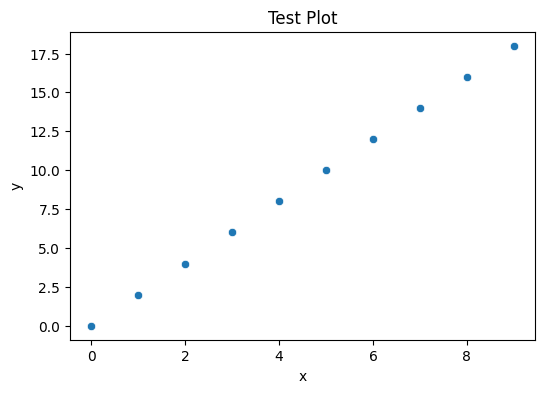

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='x', y='y', data=df)
plt.title("Test Plot")
plt.show()


In [12]:
# Split data
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 1))


Mean Squared Error: 0.0


In [2]:
# Verify installation
import nba_api

# Import core modules
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
import pandas as pd
import time

In [3]:
from nba_api.stats.static import teams

# Get all NBA teams
nba_teams = teams.get_teams()

# Convert to DataFrame
df_teams = pd.DataFrame(nba_teams)
print(df_teams.head())

# Output columns:
# id, full_name, abbreviation, nickname, city, state, year_founded

# Example output:
#    id              full_name abbreviation    nickname          city state  year_founded
# 0  1610612737  Atlanta Hawks          ATL       Hawks       Atlanta    GA          1949
# 1  1610612738  Boston Celtics         BOS     Celtics        Boston    MA          1946
# 2  1610612739  Cleveland Cavaliers    CLE   Cavaliers     Cleveland    OH          1970

# Find specific team
lakers = [team for team in nba_teams if team['full_name'] == 'Los Angeles Lakers'][0]
lakers_id = lakers['id']
print(f"Lakers ID: {lakers_id}")  # 1610612747

           id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Georgia          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966  
Lakers ID: 1610612747


In [4]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

# This will succeed on your machine:
gamefinder = leaguegamefinder.LeagueGameFinder(
    season_nullable='2023-24',
    season_type_nullable='Regular Season'
)
games = gamefinder.get_data_frames()[0]

# Process and save
games.to_csv('nba_games_2023_24.csv', index=False)

In [3]:
import pandas; 
print(pandas.__version__)

2.3.3
